# Multi-class Classification

In [16]:
import numpy as np
from numpy.typing import NDArray

from typing import Annotated
import matplotlib.pyplot as plt
import logging

import tensorflow as tf
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import sigmoid

from sklearn.datasets import make_blobs


print(f'Tensorflow version : {tf.__version__}')
print(f'Using GPU: {"no" if len(tf.config.list_physical_devices("GPU")) == 0 else "yes"}.')

# prevent tensorflow from using all the GPU memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Tensorflow version : 2.18.0
Using GPU: yes.


In [ ]:
m = 100
n_classes = 4
centers = [[-5, -2], [-2, -2], [1, 2], [5, -2]]
std = 1.0

X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

(array([[ 4.33348269e+00, -1.99457378e+00],
        [ 4.09621714e+00, -2.31200233e+00],
        [ 4.50331996e+00, -2.19036585e+00],
        [-5.39786744e+00, -9.80872615e-01],
        [ 4.21502028e+00, -3.09746680e-02],
        [ 3.76219535e+00, -3.61088073e+00],
        [ 7.18534087e+00, -2.75526173e+00],
        [ 5.43523388e+00, -1.41441859e+00],
        [ 1.59964428e+00,  1.62736685e+00],
        [-5.02919272e+00, -6.05944015e-01],
        [ 1.22928708e+00,  6.31840869e-01],
        [-1.21722350e+00, -3.79323790e+00],
        [-3.05731214e+00, -3.28411722e+00],
        [-1.67684660e+00, -2.99183439e+00],
        [-3.57449011e+00, -2.66475512e+00],
        [ 4.59607369e+00, -9.70004663e-01],
        [ 3.82586965e-02,  2.95471729e+00],
        [ 4.15508117e+00, -3.47639136e+00],
        [-7.31972218e-01, -2.28202225e+00],
        [ 5.90322174e-01,  2.57738073e+00],
        [ 4.07547460e+00, -1.63331438e+00],
        [-5.28564551e+00, -1.46163252e+00],
        [-3.16328237e+00, -2.021

/workspaces/deeplearningai-machine-learning/02_advanced_learning_algorithms/lab_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


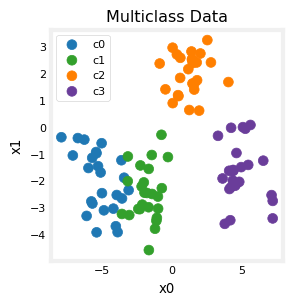

In [11]:

from lab_multiclass_TF import plt_mc

plt_mc(X_train, y_train, n_classes, centers, std)

In [14]:
print(f'Classes are: {np.unique(y_train)}')
print(f'Some classes are {y_train[:10]}')
print(f'X shape: {X_train.shape}; y shape: {y_train.shape}')

Classes are: [0 1 2 3]
Some classes are [3 3 3 0 3 3 3 3 2 0]
X shape: (100, 2); y shape: (100,)


In [21]:
# Create the model

model: tf.keras.models.Model = Sequential([
  Dense(units=2, activation='relu', name='l1'),
  Dense(units=4, activation='linear', name='output') # outputs raw logits
])

model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True)
)

In [ ]:
# Fit the model

model.fit(X_train, y_train, epochs=200);

Epoch 1/200


I0000 00:00:1763572960.129264   29088 service.cc:148] XLA service 0x7f4b14001fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763572960.129419   29088 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2025-11-19 17:22:40.150901: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763572960.199780   29088 cuda_dnn.cc:529] Loaded cuDNN version 90300


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.9392
Epoch 2/200


I0000 00:00:1763572960.646803   29088 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7610 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6078 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7471 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7216 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5427 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6016 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5981 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5155 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4122 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4269 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3542 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5857 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4021 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3665 
Epoch 16/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3661 
Epoch 17/200
4/4 ━━━━━━━━━━━━━

/workspaces/deeplearningai-machine-learning/02_advanced_learning_algorithms/lab_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/workspaces/deeplearningai-machine-learning/02_advanced_learning_algorithms/lab_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


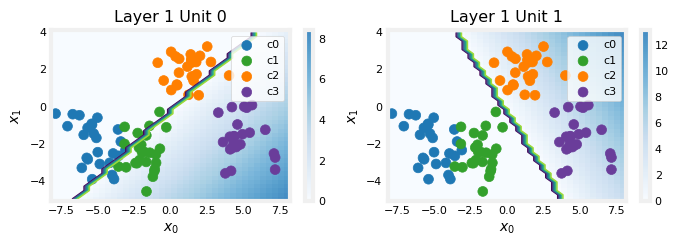

In [23]:
l1 = model.get_layer('l1')
W1, b1 = l1.get_weights()

from lab_multiclass_TF import plt_layer_relu

plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, n_classes)